# Deep Learing for Time Series in `aeon`

Deep learning is proven to be very effective for Time Series Classification (TSC) tasks after the extensive experiments done in [[1]](#references), especially Convolution based architectures i.e. FCN and ResNet [[2]](#references). A while later, InceptionTime (Convolution based) was proposed to become the new state-of-the-art deep learning model for TSC [[3]](#references). In [[4]](#references), new hand-crafted convolution filters were proposed to boost InceptionTime. The model proposed in [[4]](#references), Hybrid InceptionTime (H-InceptionTime) is currently, at the time of writing, the state-of-the-art deep learning model for TSC following [[5]](#references).

More recently, in the latest Time Series Regression (TSER) review [[6]](#references), the deep learning model InceptionTime is seen to be the state-of-the-art deep learning model.

In this notebook, we cover the usage of the deep learning models for both TSC and TSER on EEG applications.

For all figures used in this demo, we use the one provided by the [Deep Learning for Time Series Classification webpage](https://msd-irimas.github.io/pages/dl4tsc/) with this reference figure for all legends needed:

<img src="./img/deep-legend.png" alt="Deep Legend."><i>

## Table of Contents <a id='content'></a>

* [Load example data](#load-data)
* [Simple Multiple Linear Perceptron (MLP)](#mlp)
    * [Using MLP for Classification and Regression](#mlp-usage)
* [Time Convolutional Neural Network (TimeCNN)](#time-cnn-network)
    * [Using TimeCNN for Classification and Regression](#time-cnn-usage)
* [Inception Based Networks](#inception-models)
    * [InceptionTime](#inceptiontime)
        * [Using InceptionTime for Classification and Regression](#inceptiontime-usage)
    * [Hybrid InceptionTime](#hinceptiontime)
        * [Using Hybrid InceptionTime for Classification and Regression](#hinceptiontime-usage)
    * [LITETime](#litetime)
        * [Using LITETime for Classification and Regression](#litetime-usage)
* [Performance on the UCR univariate classification datasets](#evaluation)
* [References](#references)

In [46]:
# There are some deprecation warnings present in the notebook, we will ignore them.
# Remove this cell if you are interested in finding out what is changing soon, for 
# aeon there will be big changes in out v1.0.0 release!
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Load example data <a id='load-data'></a>

### EEG Classification <a id="eeg-classification-data"></a>

In [47]:
from aeon.datasets import load_from_tsfile

X_train_c, y_train_c = load_from_tsfile("./data/KDD_UTSC_TRAIN.ts")
X_test_c, y_test_c = load_from_tsfile("./data/KDD_UTSC_TEST.ts")

print("Train shape:", X_train_c.shape)
print("Test shape:", X_test_c.shape)

Train shape: (40, 1, 100)
Test shape: (40, 1, 100)


(<Figure size 1200x600 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

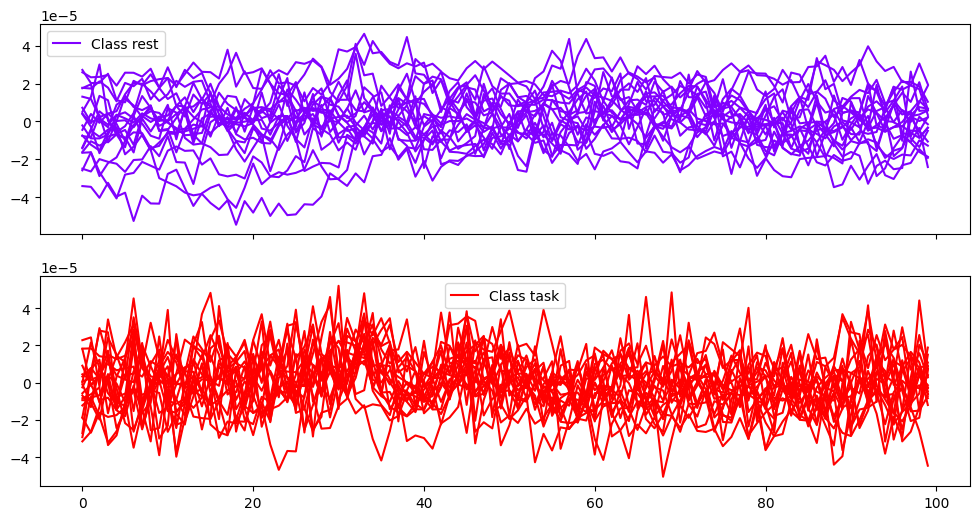

In [48]:
from aeon.visualisation import plot_collection_by_class

plot_collection_by_class(X_train_c[:,0,:], y_train_c)

### EEG Regression <a id="eeg-regression-data"></a>

In [49]:
X_train_r, y_train_r = load_from_tsfile("./data/KDD_UTSER_TRAIN.ts")
X_test_r, y_test_r = load_from_tsfile("./data/KDD_UTSER_TEST.ts")

print("Train shape:", X_train_r.shape)
print("Test shape:", X_test_r.shape)

Train shape: (72, 1, 100)
Test shape: (72, 1, 100)


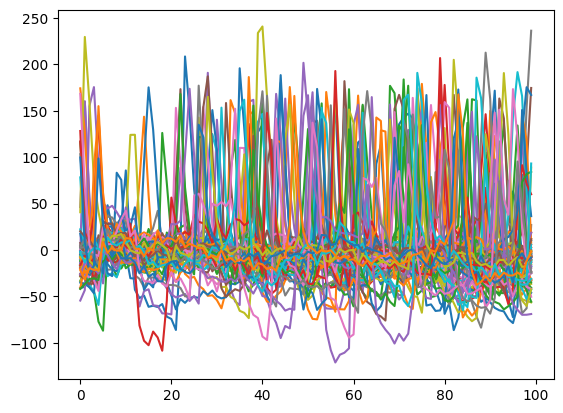

In [50]:
from matplotlib import pyplot as plt

plt.plot(X_train_r[:,0,:].T)

# Simple Multi Layer Perceptron (MLP) <a id='mlp'></a>

The Multilayer Perceptron (MLP) [[2]](#references), the simplest model in neural networks, is often used as a baseline for deep learning models. However, when applied to time series data, it fails to account for temporal dependencies. The MLP model tries to find the optimal non-linear combination of input features to achieve a good performance of a downstream task.

<img src="./img/MLP.png" alt="mlp"><i>

## Using MLP for Classificaiton and Regression <a id='mlp-usage'></a>

In [51]:
from aeon.classification.deep_learning import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_cls = MLPClassifier(n_epochs=20)
mlp_cls.fit(X_train_c, y_train_c)
mlp_cls_preds = mlp_cls.predict(X_test_c)
print(accuracy_score(y_test_c, mlp_cls_preds))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.5


In [52]:
from aeon.regression.deep_learning import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_rgs = MLPRegressor(n_epochs=20)
mlp_rgs.fit(X_train_r, y_train_r)
mlp_rgs_preds = mlp_rgs.predict(X_test_r)
print(mean_squared_error(y_test_r, mlp_rgs_preds))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
66.53652419378743


(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Actual values', ylabel='Predicted values'>)

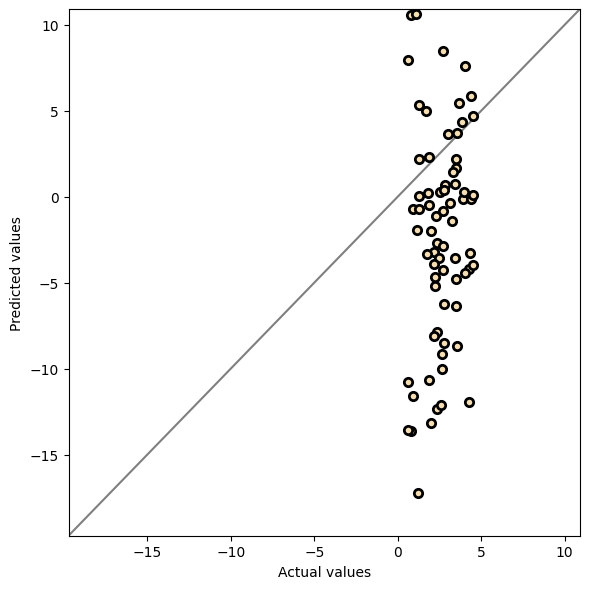

In [53]:
from aeon.visualisation import plot_scatter_predictions

plot_scatter_predictions(y_test_r, mlp_rgs_preds)

## The Time Convolutional Neural Network (TimeCNN) <a id="time-cnn-network"></a>

The Time Convolutional Neural Network (TimeCNN) [[7]](#references) is a convolutional neural network where the optimization process focuses on learning the most effective filters to achieve optimal results. Unlike MLP, TimeCNN leverages local convolutions, allowing them to capture and consider temporal dependencies in the data, making them more suitable for time series analysis.

<img src="./img/TimeCNN.png" alt="cnn"><i>

## Using TimeCNN for Classificaiton and Regression <a id='time-cnn-usage'></a>

In [54]:
from aeon.classification.deep_learning import CNNClassifier
from sklearn.metrics import accuracy_score

cnn_cls = CNNClassifier(n_epochs=20)
cnn_cls.fit(X_train_c, y_train_c)
cnn_cls_preds = cnn_cls.predict(X_test_c)
print(accuracy_score(y_test_c, cnn_cls_preds))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.5


In [55]:
from aeon.regression.deep_learning import CNNRegressor
from sklearn.metrics import mean_squared_error

cnn_rgs = CNNRegressor(n_epochs=20)
cnn_rgs.fit(X_train_r, y_train_r)
cnn_rgs_preds = cnn_rgs.predict(X_test_r)
print(mean_squared_error(y_test_r, cnn_rgs_preds))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1.316858996455427


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'TimeCNN Predictions'}, xlabel='Actual values', ylabel='Predicted values'>)

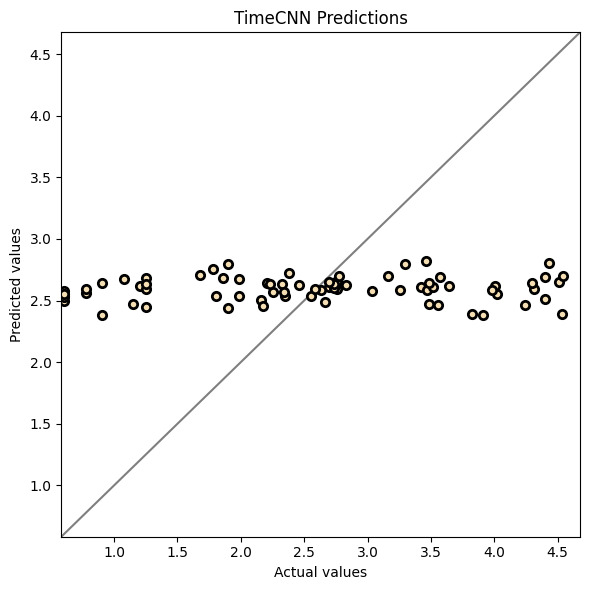

In [56]:
from aeon.visualisation import plot_scatter_predictions

plot_scatter_predictions(y_test_r, cnn_rgs_preds, title="TimeCNN Predictions")

## Inception Based Models <a id="inception-models"></a>

### InceptionTime <a id="inceptiontime"></a>

InceptionTime [[3]](#references) is an ensemble of multiple Inception models, a convolution based neural network that leverages over TimecNN by applying different convolution layers in parallel with different characteristics as well as using residual connections to avoid the vanishing gradient issue.

<img src="./img/InceptionTime.png" alt="inctime"><i>

#### Using InceptionTime for Classificaiton and Regression <a id='inceptiontime-usage'></a>

In [57]:
from aeon.classification.deep_learning import InceptionTimeClassifier
from sklearn.metrics import accuracy_score

inceptiontime_cls = InceptionTimeClassifier(n_epochs=20)
inceptiontime_cls.fit(X_train_c, y_train_c)
inceptiontime_cls_preds = inceptiontime_cls.predict(X_test_c)
print("InceptionTime: ",accuracy_score(y_test_c, inceptiontime_cls_preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
InceptionTime:  0.5


In [58]:
from aeon.regression.deep_learning import InceptionTimeRegressor
from sklearn.metrics import mean_squared_error

inceptiontime_rgs = InceptionTimeRegressor(n_epochs=20)
inceptiontime_rgs.fit(X_train_r, y_train_r)
inceptiontime_rgs_preds = inceptiontime_rgs.predict(X_test_r)
print("InceptionTime: ",mean_squared_error(y_test_r, inceptiontime_rgs_preds))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
InceptionTime:  76.66128825439442


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'InceptionTime Regressor Predictions'}, xlabel='Actual values', ylabel='Predicted values'>)

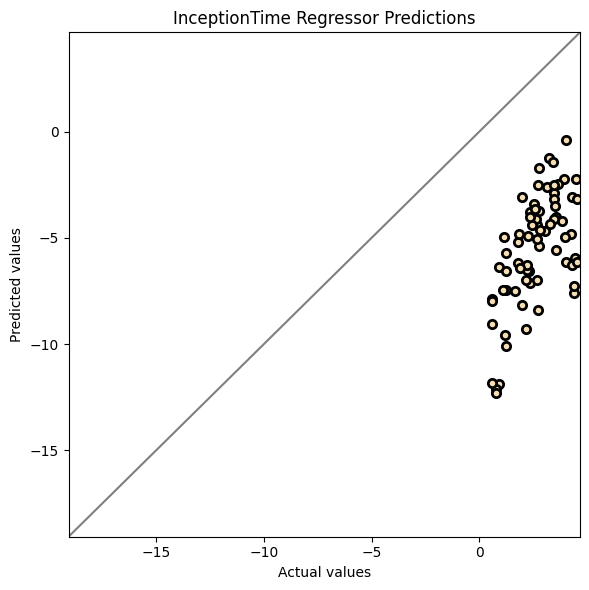

In [59]:
from aeon.visualisation import plot_scatter_predictions

plot_scatter_predictions(y_test_r, inceptiontime_rgs_preds, title="InceptionTime Regressor Predictions")

### Hybrid InceptionTime <a id="hinceptiontime"></a>

H-InceptionTime [[4]](#references) leverages over the InceptionTime model by adding some hand-crafted convolution filters at the beginning of the model. Such feature engineering technique helps the model generalize better to unseen cases.

<img src="./img/hcf.png" style="width: 50%; height: auto; display: block; margin-left: auto; margin-right: auto;" alt="hcf"><i>

#### Using Hybrid InceptionTime for Classificaiton and Regression <a id='hinceptiontime-usage'></a>

In [60]:
from aeon.classification.deep_learning import InceptionTimeClassifier
from sklearn.metrics import accuracy_score

h_inceptiontime_cls = InceptionTimeClassifier(n_epochs=20, use_custom_filters=True)
h_inceptiontime_cls.fit(X_train_c, y_train_c)
h_inceptiontime_cls_preds = h_inceptiontime_cls.predict(X_test_c)
print("H-InceptionTime: ",accuracy_score(y_test_c, h_inceptiontime_cls_preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
H-InceptionTime:  0.5


In [66]:
from aeon.regression.deep_learning import InceptionTimeRegressor
from sklearn.metrics import mean_squared_error

h_inceptiontime_rgs = InceptionTimeRegressor(n_epochs=20, use_custom_filters=True)
h_inceptiontime_rgs.fit(X_train_r, y_train_r)
h_inceptiontime_rgs_preds = h_inceptiontime_rgs.predict(X_test_r)
print("H-InceptionTime: ",mean_squared_error(y_test_r, h_inceptiontime_rgs_preds))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step
H-InceptionTime:  15.971820461373166


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'H-InceptionTime Regressor Predictions'}, xlabel='Actual values', ylabel='Predicted values'>)

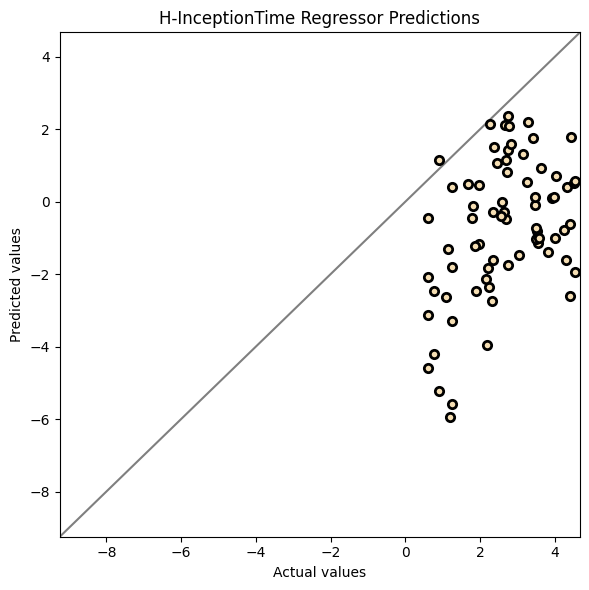

In [67]:
from aeon.visualisation import plot_scatter_predictions

plot_scatter_predictions(y_test_r, h_inceptiontime_rgs_preds, title="H-InceptionTime Regressor Predictions")

### LITETime <a id="litetime"></a>

LITETime [[8]](#references) is currently the smallest deep learning model that achieves state-of-the-art performance on TSC. It is based on the Inception architecture but with way less parameters to train while utilizing as well the hand-crafted convolution filters in the first layer.

<img src="./img/LITE.png" alt="lite"><i>

#### Using LITETime for Classificaiton and Regression <a id='litetime-usage'></a>

In [68]:
from aeon.classification.deep_learning import LITETimeClassifier
from sklearn.metrics import accuracy_score

litetime_cls = LITETimeClassifier(n_epochs=20)
litetime_cls.fit(X_train_c, y_train_c)
litetime_cls_preds = litetime_cls.predict(X_test_c)
print("LITETime: ",accuracy_score(y_test_c, litetime_cls_preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
LITETime:  0.5


In [69]:
from aeon.regression.deep_learning import LITETimeRegressor
from sklearn.metrics import mean_squared_error

litetime_rgs = LITETimeRegressor(n_epochs=20)
litetime_rgs.fit(X_train_r, y_train_r)
litetime_rgs_preds = litetime_rgs.predict(X_test_r)
print("LITETime: ",mean_squared_error(y_test_r, litetime_rgs_preds))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
LITETime:  7.360054963437725


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'LITETime Regressor Predictions'}, xlabel='Actual values', ylabel='Predicted values'>)

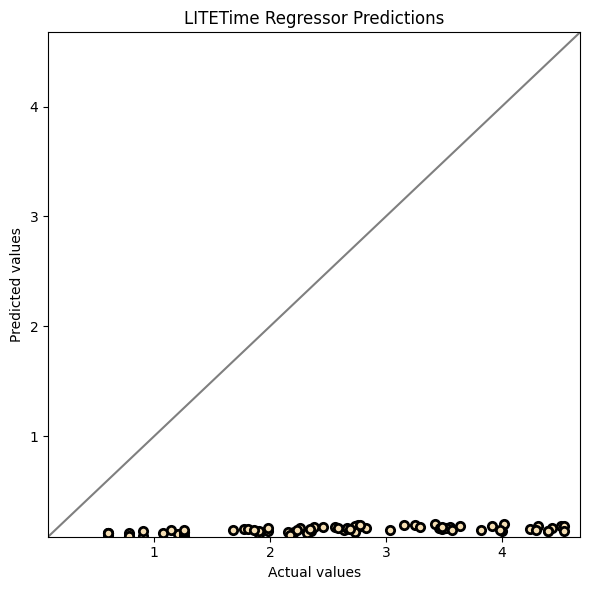

In [70]:
from aeon.visualisation import plot_scatter_predictions

plot_scatter_predictions(y_test_r, litetime_rgs_preds, title="LITETime Regressor Predictions")

## Performance on the UCR univariate classification datasets <a id='evaluation'></a>

Below we show the performance of the `MLP`, `InceptionTime` and `H-InceptionTime` deep learning models on the UCR TSC archive datasets [[9]](#references) using results from the TSC bake off in 2024 [[5]](#references).

In [71]:
from aeon.benchmarking import get_estimator_results_as_array
from aeon.datasets.tsc_datasets import univariate

names = ["CNN", "InceptionTime", "H-InceptionTime", "LITETime", "1NN-DTW"]
results, present_names = get_estimator_results_as_array(
    names, univariate, include_missing=False
)
results.shape

(112, 5)

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

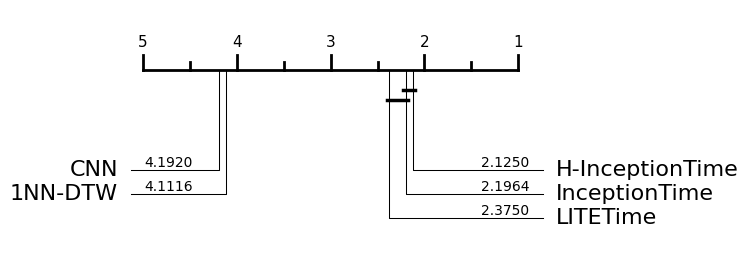

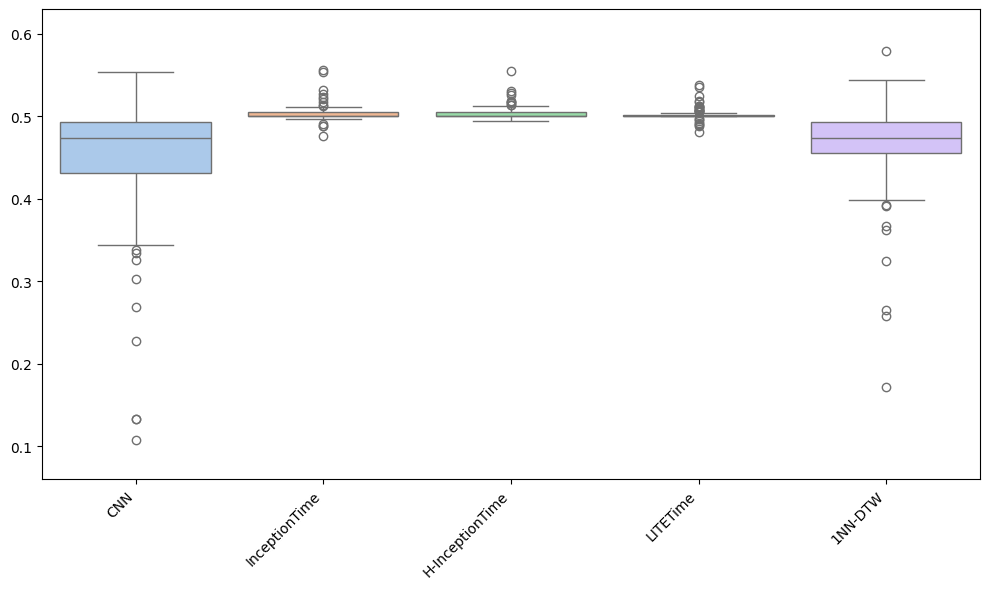

In [72]:
from aeon.visualisation import plot_critical_difference
from aeon.visualisation import plot_boxplot_median

plot_critical_difference(results, names)
plot_boxplot_median(results, names, plot_type="boxplot")

## References <a id='references'></a>

[1] Ismail Fawaz, Hassan, et al. "Deep learning for time series classification: a review." Data mining and knowledge discovery 33.4 (2019): 917-963.

[2] Wang, Zhiguang et al. "Time series classification from scratch with deep neural networks: A strong baseline." 2017 International joint conference on neural networks (IJCNN). IEEE, 2017.

[3] Ismail Fawaz, Hassan, et al. "Inceptiontime: Finding alexnet for time series classification." Data Mining and Knowledge Discovery 34.6 (2020): 1936-1962.

[4] Ismail-Fawaz, Ali, et al. "Deep Learning For Time Series Classification Using New Hand-Crafted Convolution Filters." International Conference on Big Data. IEEE, (2022).

[5] Middlehurst, Matthew, Patrick Schäfer, and Anthony Bagnall. "Bake off redux: a review and experimental evaluation of recent time series classification algorithms." Data Mining and Knowledge Discovery (2024): 1-74.

[6] Guijo-Rubio, David, et al. "Unsupervised Feature Based Algorithms for Time Series Extrinsic Regression." arXiv preprint arXiv:2305.01429 (2023).

[7] Zhao et al. Convolutional neural networks for time series classification. Journal of Systems Engineering and Electronics 28.1 (2017)

[8] Ismail-Fawaz, Ali, et al. "Lite: Light inception with boosting techniques for time series classification." 2023 IEEE 10th International Conference on Data Science and Advanced Analytics (DSAA). IEEE, 2023.

[9] Dau, Hoang Anh, et al. "The UCR time series archive." IEEE/CAA Journal of Automatica Sinica 6.6 (2019): 1293-1305.